In [1]:
import os 
import pandas as pd
import numpy as np
import re
import string
import nltk
wn = nltk.WordNetLemmatizer()
from nltk.corpus import stopwords
from matplotlib import pyplot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', 100)
stopwords =  nltk.corpus.stopwords.words('english')
df = pd.read_csv(r'C:\Users\ghect\Documents\Bootcamp\Proyectos\Data_Cleaning\Proyecto_Noticias_Falsas\Noticias_falsas_crudo.csv', encoding="ISO-8859-1")
df = df.set_index('id', drop=True)
df.head()

,title,author,text,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
id,,,,,,,,,,,,,,,,,,,,,
0,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It By Darrell...,false,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart",Daniel J. Flynn,Ever get the feeling your life circles the roundabout rather than heads in a straight line towar...,true,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, 2016 \nThe tension between intelligence analysts a...",false,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15 Civilians Killed In Single US Airstrike Have Been Identified,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilia...,false,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery,Howard Portnoy,Print \nAn Iranian woman has been sentenced to six years in prison after Iranâs Revolutionary ...,false,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Eliminar nulos

In [2]:
def eliminar_nulos(df):
    null_cols = df.isnull().sum()
    eliminar_cols = list(null_cols[null_cols >= 4600].index)
    df_nulos = df.drop(eliminar_cols, axis=1)
    df_nulos = df_nulos.drop('Unnamed: 5', axis=1)
    df_eliminar_nulos = df_nulos.dropna()
    return df_eliminar_nulos

df_sin_nulos = eliminar_nulos(df)
df_sin_nulos.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It By Darrell...,false
1,"FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart",Daniel J. Flynn,Ever get the feeling your life circles the roundabout rather than heads in a straight line towar...,true
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, 2016 \nThe tension between intelligence analysts a...",false
3,15 Civilians Killed In Single US Airstrike Have Been Identified,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilia...,false
4,Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery,Howard Portnoy,Print \nAn Iranian woman has been sentenced to six years in prison after Iranâs Revolutionary ...,false


# Longitud mensajes

In [3]:
def longitud_textos(df_sin_nulos):
    df_sin_nulos['titulo_long'] = df_sin_nulos['title'].apply(lambda x: len(x))
    df_sin_nulos['autor_long'] = df_sin_nulos['author'].apply(lambda x: len(x))
    df_sin_nulos['texto_long'] = df_sin_nulos['text'].apply(lambda x: len(x))
    longitudes = df_sin_nulos.loc[:, ['title', 'titulo_long', 'author', 'autor_long', 'text', 'texto_long', 'label']]
    return longitudes

df_long = longitud_textos(df_sin_nulos)
df_long.head()

,title,titulo_long,author,autor_long,text,texto_long,label
id,,,,,,,
0,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It,85,Darrell Lucus,13,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It By Darrell...,4996,false
1,"FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart",55,Daniel J. Flynn,15,Ever get the feeling your life circles the roundabout rather than heads in a straight line towar...,4250,true
2,Why the Truth Might Get You Fired,33,Consortiumnews.com,18,"Why the Truth Might Get You Fired October 29, 2016 \nThe tension between intelligence analysts a...",7786,false
3,15 Civilians Killed In Single US Airstrike Have Been Identified,63,Jessica Purkiss,15,Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilia...,3261,false
4,Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery,93,Howard Portnoy,14,Print \nAn Iranian woman has been sentenced to six years in prison after Iranâs Revolutionary ...,958,false


# Contando la puntuacion

In [4]:
def puntuacion_contador(txt):
    contador = sum([1 for caracter in txt if caracter in string.punctuation])
    return contador

def puntuacion_aplicado(df_long):
    df_long['puntuacion_titulo'] = df_long['title'].apply(lambda x: puntuacion_contador(x))
    df_long['puntuacion_autor'] = df_long['author'].apply(lambda x: puntuacion_contador(x))
    df_long['puntuacion_texto'] = df_long['text'].apply(lambda x: puntuacion_contador(x))
    puntuaciones = df_long.loc[:, ['title', 'titulo_long', 'puntuacion_titulo', 'author', 'autor_long', 'puntuacion_autor', 'text', 'texto_long', 'puntuacion_texto', 'label']]
    return puntuaciones

df_puntuaciones = puntuacion_aplicado(df_long)
df_puntuaciones.head()

,title,titulo_long,puntuacion_titulo,author,autor_long,puntuacion_autor,text,texto_long,puntuacion_texto,label
id,,,,,,,,,,
0,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It,85,1,Darrell Lucus,13,0,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It By Darrell...,4996,88,false
1,"FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart",55,3,Daniel J. Flynn,15,1,Ever get the feeling your life circles the roundabout rather than heads in a straight line towar...,4250,74,true
2,Why the Truth Might Get You Fired,33,0,Consortiumnews.com,18,1,"Why the Truth Might Get You Fired October 29, 2016 \nThe tension between intelligence analysts a...",7786,184,false
3,15 Civilians Killed In Single US Airstrike Have Been Identified,63,0,Jessica Purkiss,15,0,Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilia...,3261,51,false
4,Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery,93,0,Howard Portnoy,14,0,Print \nAn Iranian woman has been sentenced to six years in prison after Iranâs Revolutionary ...,958,16,false


# Puntuacion porcentaje

In [5]:
def punt_porciento(txt):
    contador = sum([1 for caracter in txt if caracter in string.punctuation])
    return 100*contador/len(txt)

def punt_porciento_aplicado(df_puntuaciones):
    df_puntuaciones['puntuacion_titulo_%'] = df_puntuaciones['title'].apply(lambda x: punt_porciento(x))
    df_puntuaciones['puntuacion_autor_%'] = df_puntuaciones['author'].apply(lambda x: punt_porciento(x))
    df_puntuaciones['puntuacion_texto_%'] = df_puntuaciones['text'].apply(lambda x: punt_porciento(x))
    puntuacion_porcentaje = df_puntuaciones.loc[:, ['title', 'titulo_long', 'puntuacion_titulo', 'puntuacion_titulo_%', 'author', 'autor_long', 'puntuacion_autor', 'puntuacion_autor_%', 'text', 'texto_long', 'puntuacion_texto', 'puntuacion_texto_%', 'label']]
    return puntuacion_porcentaje

df_punt_porcentaje = punt_porciento_aplicado(df_puntuaciones)
df_punt_porcentaje.head()

,title,titulo_long,puntuacion_titulo,puntuacion_titulo_%,author,autor_long,puntuacion_autor,puntuacion_autor_%,text,texto_long,puntuacion_texto,puntuacion_texto_%,label
id,,,,,,,,,,,,,
0,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It,85,1,1.176471,Darrell Lucus,13,0,0.000000,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It By Darrell...,4996,88,1.761409,false
1,"FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart",55,3,5.454545,Daniel J. Flynn,15,1,6.666667,Ever get the feeling your life circles the roundabout rather than heads in a straight line towar...,4250,74,1.741176,true
2,Why the Truth Might Get You Fired,33,0,0.000000,Consortiumnews.com,18,1,5.555556,"Why the Truth Might Get You Fired October 29, 2016 \nThe tension between intelligence analysts a...",7786,184,2.363216,false
3,15 Civilians Killed In Single US Airstrike Have Been Identified,63,0,0.000000,Jessica Purkiss,15,0,0.000000,Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilia...,3261,51,1.563937,false
4,Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery,93,0,0.000000,Howard Portnoy,14,0,0.000000,Print \nAn Iranian woman has been sentenced to six years in prison after Iranâs Revolutionary ...,958,16,1.670146,false


In [6]:
def clas(var: int) -> int :
    if var == 'true':
        return 0
    else:
        return 1

df_punt_porcentaje['clasificacion'] = df_punt_porcentaje['label'].apply(clas)
df_punt_porcentaje.head()

,title,titulo_long,puntuacion_titulo,puntuacion_titulo_%,author,autor_long,puntuacion_autor,puntuacion_autor_%,text,texto_long,puntuacion_texto,puntuacion_texto_%,label,clasificacion
id,,,,,,,,,,,,,,
0,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It,85,1,1.176471,Darrell Lucus,13,0,0.000000,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It By Darrell...,4996,88,1.761409,false,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart",55,3,5.454545,Daniel J. Flynn,15,1,6.666667,Ever get the feeling your life circles the roundabout rather than heads in a straight line towar...,4250,74,1.741176,true,0
2,Why the Truth Might Get You Fired,33,0,0.000000,Consortiumnews.com,18,1,5.555556,"Why the Truth Might Get You Fired October 29, 2016 \nThe tension between intelligence analysts a...",7786,184,2.363216,false,1
3,15 Civilians Killed In Single US Airstrike Have Been Identified,63,0,0.000000,Jessica Purkiss,15,0,0.000000,Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilia...,3261,51,1.563937,false,1
4,Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery,93,0,0.000000,Howard Portnoy,14,0,0.000000,Print \nAn Iranian woman has been sentenced to six years in prison after Iranâs Revolutionary ...,958,16,1.670146,false,1


# Columna verdadero o falso

In [7]:
def etiqueta_vf(x):
    if x == 'true':
        return 'verdadero'
    else:
        return 'falso'

df_punt_porcentaje['etiqueta'] = df_punt_porcentaje['label'].apply(etiqueta_vf)
df_punt_porcentaje.head()

,title,titulo_long,puntuacion_titulo,puntuacion_titulo_%,author,autor_long,puntuacion_autor,puntuacion_autor_%,text,texto_long,puntuacion_texto,puntuacion_texto_%,label,clasificacion,etiqueta
id,,,,,,,,,,,,,,,
0,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It,85,1,1.176471,Darrell Lucus,13,0,0.000000,House Dem Aide: We Didnât Even See Comeyâs Letter Until Jason Chaffetz Tweeted It By Darrell...,4996,88,1.761409,false,1,falso
1,"FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart",55,3,5.454545,Daniel J. Flynn,15,1,6.666667,Ever get the feeling your life circles the roundabout rather than heads in a straight line towar...,4250,74,1.741176,true,0,verdadero
2,Why the Truth Might Get You Fired,33,0,0.000000,Consortiumnews.com,18,1,5.555556,"Why the Truth Might Get You Fired October 29, 2016 \nThe tension between intelligence analysts a...",7786,184,2.363216,false,1,falso
3,15 Civilians Killed In Single US Airstrike Have Been Identified,63,0,0.000000,Jessica Purkiss,15,0,0.000000,Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilia...,3261,51,1.563937,false,1,falso
4,Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery,93,0,0.000000,Howard Portnoy,14,0,0.000000,Print \nAn Iranian woman has been sentenced to six years in prison after Iranâs Revolutionary ...,958,16,1.670146,false,1,falso


In [8]:
df_punt_porcentaje.to_csv('Noticias_Falsas_Conteo.csv')

# Graficar longitudes de mensajes

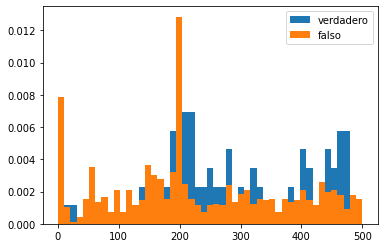

In [9]:
bins = np.linspace(0, 500, 50)
pyplot.hist(df_puntuaciones[df_punt_porcentaje['etiqueta'] == 'verdadero']['texto_long'], bins, label='verdadero', density=True)
pyplot.hist(df_puntuaciones[df_punt_porcentaje['etiqueta'] == 'falso']['texto_long'], bins, label='falso', density=True)
pyplot.legend(loc='upper right')
pyplot.show()

# Graficando puntuacion

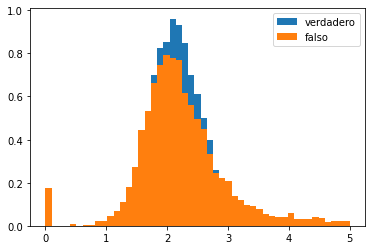

In [10]:
#Porcentaje
bins = np.linspace(0, 5, 50)
pyplot.hist(df_puntuaciones[df_punt_porcentaje['etiqueta'] == 'verdadero']['puntuacion_texto_%'], bins, label='verdadero', density=True)
pyplot.hist(df_puntuaciones[df_punt_porcentaje['etiqueta'] == 'falso']['puntuacion_texto_%'], bins, label='falso', density=True)
pyplot.legend(loc='upper right')
pyplot.show()

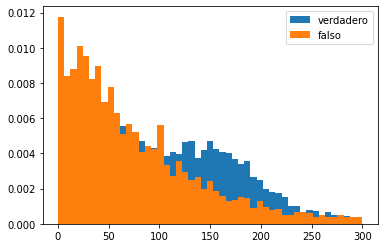

In [11]:
bins = np.linspace(0, 300, 50)
pyplot.hist(df_puntuaciones[df_punt_porcentaje['etiqueta'] == 'verdadero']['puntuacion_texto'], bins, label='verdadero', density=True)
pyplot.hist(df_puntuaciones[df_punt_porcentaje['etiqueta'] == 'falso']['puntuacion_texto'], bins, label='falso', density=True)
pyplot.legend(loc='upper right')
pyplot.show()

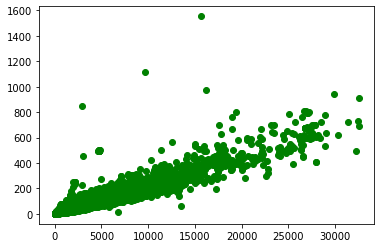

In [12]:
x = df_punt_porcentaje[df_punt_porcentaje['etiqueta'] == 'falso']['texto_long']
y = df_punt_porcentaje[df_punt_porcentaje['etiqueta'] == 'falso']['puntuacion_texto']
plt.scatter(x, y, color='green')
plt.show()

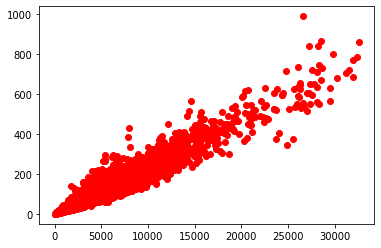

In [13]:
x1 = df_punt_porcentaje[df_punt_porcentaje['etiqueta'] == 'verdadero']['texto_long']
y1 = df_punt_porcentaje[df_punt_porcentaje['etiqueta'] == 'verdadero']['puntuacion_texto']
plt.scatter(x1, y1, color='red')
plt.show()

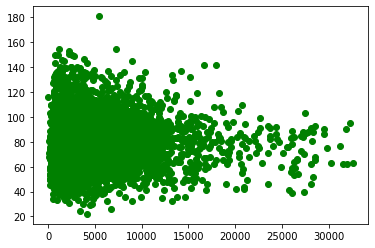

In [14]:
x2 = df_punt_porcentaje[df_punt_porcentaje['etiqueta'] == 'verdadero']['texto_long']
y2 = df_punt_porcentaje[df_punt_porcentaje['etiqueta'] == 'verdadero']['titulo_long']
plt.scatter(x2, y2, color='green')
plt.show()

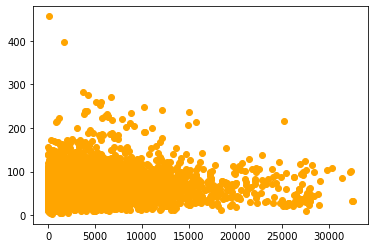

In [15]:
x3 = df_punt_porcentaje[df_punt_porcentaje['etiqueta'] == 'falso']['texto_long']
y3 = df_punt_porcentaje[df_punt_porcentaje['etiqueta'] == 'falso']['titulo_long']
plt.scatter(x3, y3, color='orange')
plt.show()

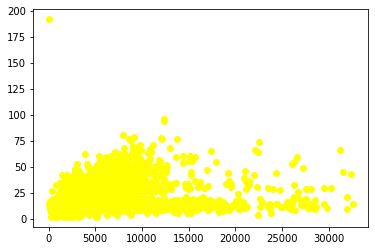

In [16]:
x2a = df_punt_porcentaje[df_punt_porcentaje['etiqueta'] == 'verdadero']['texto_long']
y2a = df_punt_porcentaje[df_punt_porcentaje['etiqueta'] == 'verdadero']['autor_long']
plt.scatter(x2a, y2a, color='yellow')
plt.show()

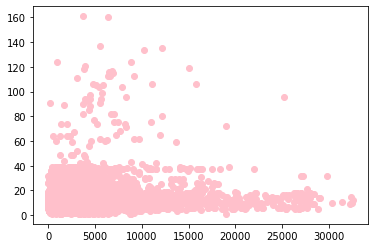

In [17]:
x3a = df_punt_porcentaje[df_punt_porcentaje['etiqueta'] == 'falso']['texto_long']
y3a = df_punt_porcentaje[df_punt_porcentaje['etiqueta'] == 'falso']['autor_long']
plt.scatter(x3a, y3a, color='pink')
plt.show()

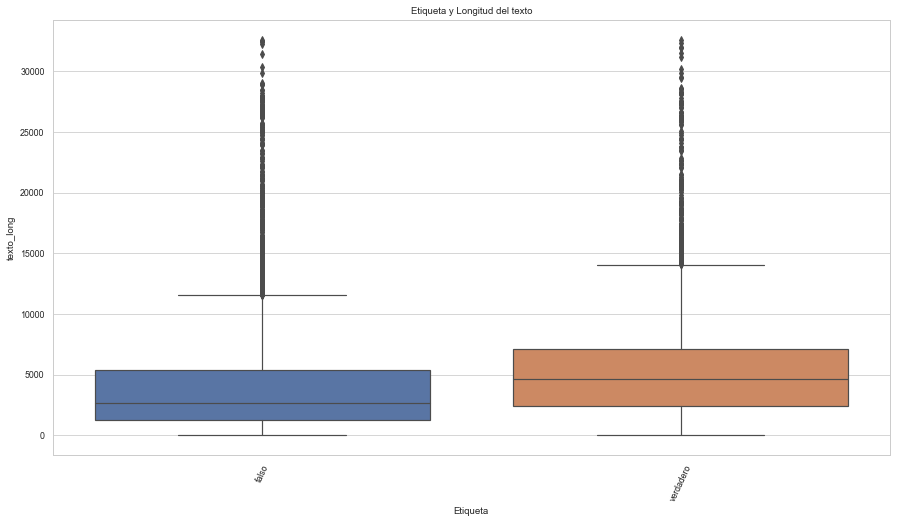

In [18]:
# sns.set(context='paper', style='whitegrid', rc={'figure.figsize': (15, 8)})

# ax = sns.boxplot(x=df['ocupacion'], y=df['edad'])

# ax.set_title('Ocupación y Edad')
# ax.set(xlabel='Ocupación', ylabel='Edad')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=65);

sns.set(context='paper', style='whitegrid', rc={'figure.figsize': (15, 8)})

ax = sns.boxplot(x=df_punt_porcentaje['etiqueta'], y=df_punt_porcentaje['texto_long'])

ax.set_title('Etiqueta y Longitud del texto')
ax.set(xlabel='Etiqueta', ylabel='texto_long')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65);

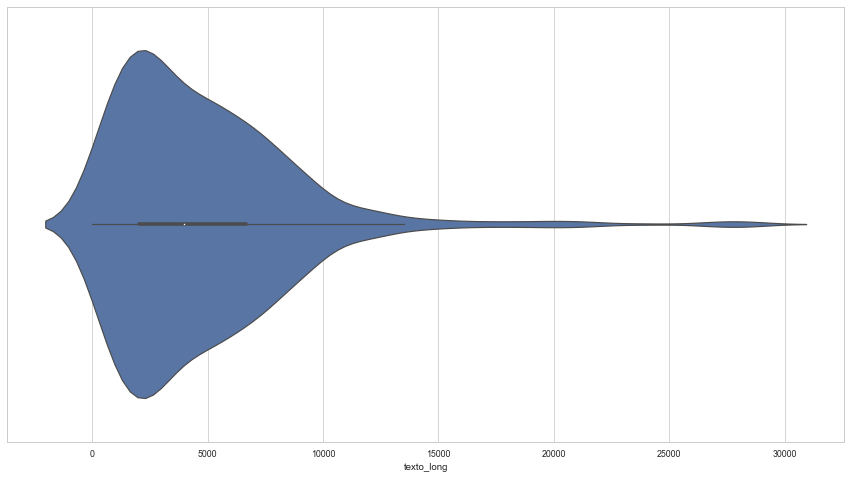

In [19]:
sns.violinplot(data=df_punt_porcentaje[:1_000], x='texto_long');

In [20]:
# import seaborn as sns

# pd.set_option('display.max_colwidth', 100)
# fig, ax = plt.subplots(2, 2, figsize=(15,8))

# sns.countplot(data=df[df['ano']==2017].sort_values('mes_num'), 
#               x='mes_num', palette='vlag', ax=ax[0, 0])
# ax[0, 0].set_title('NILE_2017')

# sns.countplot(data=df[df['ano']==2018].sort_values('mes_num'), 
#               x='mes_num', palette='vlag', ax=ax[0, 1])
# ax[0, 0].set_title('NILE_2018')

# sns.countplot(data=df[df['ano']==2019].sort_values('mes_num'), 
#               x='mes_num', palette='vlag', ax=ax[1, 0])
# ax[0, 0].set_title('NILE_2019')

# sns.countplot(data=df[df['ano']==2020].sort_values('mes_num'), 
#               x='mes_num', palette='vlag', ax=ax[1, 1])
# ax[0, 0].set_title('NILE_2020')